https://www.browserstack.com/guide/selenium-cheatsheet

https://www.selenium.dev/documentation/webdriver/getting_started/first_script/

Tips:
To achieve the required functionality, the following steps should be in sequence:
1. Import Selenium and time module
2. Add chrome driver path and Google Form URL (The chromedriver.exe file should be
placed in the same folder, as the Jupyter Notebook.)
3. Add some delay, until page gets fully loaded
4. Add data in the form of list
5. Iterate through each data and fill detail
6. Close the window


In [ ]:
%pip install selenium
%pip install Faker
%pip install psycopg2

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time
import numpy as np
from faker import Faker
fake = Faker()
import random
import string
from pprint import pprint
from flask import Flask, render_template_string, jsonify
from collections import OrderedDict
import nest_asyncio
import threading
import requests

## 1. Data Collection

#### Generate synthetic data and simulate real-world data imperfections

##### - Simulate realistic data without exposing real customer records
##### - No GDPR/PDPA issues
##### - Scalability for robustness and stress testing

https://machinelearningmastery.com/synthetic-dataset-generation-with-faker/

https://faker.readthedocs.io/en/master/

https://pypi.org/project/randomname/

In [3]:
def generate_jde_records(record_to_generate):

    """
    Generates a single synthetic JDE record
    
    Parameters:
    record_to_generate (int): The number of records to generate

    Returns:
        list: A list of generated records
    """
    
    generated_records = []

    count = 0
    while count < record_to_generate:

        # Generate synthetic id (with data issues). Might be a JDE applicant using fake id
        random_first_letter = random.choice(string.ascii_letters).upper()
        random_seven_digits_str = "".join(str(random.randint(0, 9)) for _ in range(7))
        random_last_letter = random.choice(string.ascii_letters).upper()
        random_nric = random_first_letter + random_seven_digits_str + random_last_letter
       
        # Generate synthetic email (with data issues)
        # random.random() returns a random decimal number between 0.0 and 1.0 (e.g., 0.275, 0.941, 0.005)
        # if > 0.1 means 90% of the time, generate a fake email. 10% of the time, don't create an email.
        email_field = fake.email() if random.random() > 0.1 else None 

        # Generate synthetic phone number (with data issues)
        phone_number_field = "".join(str(random.randint(0, 9)) for _ in range(7)) if random.random() > 0.1 else None
        
        # Generate synthetic comments (with data issues)
        # No limit to the number of words
        comment_field = fake.text()

        # Generate synthetic name and address (no data issues)
        name_field = fake.name()
        address_field = fake.address()

        random_single_record = [random_nric, name_field, email_field, address_field, phone_number_field, comment_field]

        generated_records.append(random_single_record)
        count += 1

    return generated_records

# Generate X no. of records
data = generate_jde_records(1000)

print(f"Quick validation on 1st row:\n {data[0]}\n")
print(f"Quick validation on 2nd row:\n {data[1]}\n")
print(f"{len(data)} synthetic data generated ✅.")

Quick validation on 1st row:
 ['U5523610Y', 'Brandon Griffin', 'nsolomon@example.org', '521 Baker Mission Apt. 380\nNorth Nicole, HI 24649', None, 'Modern star per play suffer protect wall. Will show morning main since hold.\nThing ground movie surface nature perform cut. Performance have my term century.']

Quick validation on 2nd row:
 ['Z6508817H', 'Julie Rivera', 'kellylindsey@example.org', '934 Richard Summit Apt. 085\nMariafurt, UT 31082', '2793454', 'Thought end when station worker college. Investment help strong different many relate artist. Though indicate power house peace.']

1000 synthetic data generated ✅.


#### Create a simple local webpage with JDE data
##### This is to mimic an actual web page that contains JDE data

In [5]:
# Apply patch so Flask works inside Jupyter Notebook
nest_asyncio.apply()

# This line creates the Flask app using the current file's name
# Flask uses this name to locate resources and set up the web server
app = Flask(__name__)

# Column headers
columns = ["NRIC", "Name", "Email", "Address", "Phone", "Comments"]

# HTML template
html_template = """
<!DOCTYPE html>
<html>
<head>
    <title>JDE User Data</title>
    <style>
        body { font-family: Arial, sans-serif; }
        h2 { text-align: center; margin-top: 2rem; }
        table { border-collapse: collapse; width: 80%; margin: 2rem auto; }
        th, td { border: 1px solid #ddd; padding: 8px; text-align: left; }
        th { background-color: #f4f4f4; }
    </style>
</head>
<body>
    <h2>JDE User Data</h2>
    <table>
        <thead>
            <tr>
                {% for col in columns %}
                <th>{{ col }}</th>
                {% endfor %}
            </tr>
        </thead>
        <tbody>
            {% for row in data %}
            <tr>
                {% for item in row %}
                <td>{{ item }}</td>
                {% endfor %}
            </tr>
            {% endfor %}
        </tbody>
    </table>
</body>
</html>
"""

# Route to render the HTML webpage with the data table
# When a user visits the homepage ("/"), this function displays the data table
@app.route("/")
def home():
    return render_template_string(html_template, data=data, columns=columns)

# Define a route for the API endpoint "/api/data"
# When a GET request is made to this URL, the function below is triggered
@app.route("/api/data", methods=["GET"])
def get_data():
    # Ensure each row is returned as a dictionary with fields in the correct order
    json_data = [OrderedDict((col, value) for col, value in zip(columns, row)) for row in data]
    return jsonify(json_data)

# Function to start the Flask web server
# - port=5001: The local server will be hosted at http://127.0.0.1:5001
# - debug=False: Disables debug mode, which hides error messages from users
# - use_reloader=False: Prevents the server from restarting twice when running in certain environments (e.g. Jupyter)
def run_app():
    app.run(port=5001, debug=False, use_reloader=False)

# Start the app in a background thread (Jupyter-friendly)
thread = threading.Thread(target=run_app)
thread.start()

# Inform users of how to access the site and API
print("✅ Flask server is running!")
print("🌐 Visit the following link in your browser to view the website: http://127.0.0.1:5001")
print("📦 To view the API response: http://127.0.0.1:5001/api/data")

✅ Flask server is running!
🌐 Visit the following link in your browser to view the website: http://127.0.0.1:5001
📦 To view the API response: http://127.0.0.1:5001/api/data
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [03/Aug/2025 17:54:03] "GET /api/data HTTP/1.1" 200 -


## 2. Data Extraction

#### Simulate data extraction from the web via API

https://www.linkedin.com/pulse/how-work-apis-python-friendly-guide-real-examples-indradeep-halder-zvipf/

In [6]:
# This line sends a GET request to the local REST API endpoint hosted by the Flask app
# The address http://127.0.0.1:5001 refers to the local web server running on your computer (localhost, port 5001)
response = requests.get("http://127.0.0.1:5001/api/data")

# Checks whether the request was successful. A status code of 200 means "OK"
# Assign to variable "extracted_data" in the correct nested list format
if response.status_code == 200:
    json_data = response.json()
    extracted_data = [[entry["NRIC"], entry["Name"], entry["Email"], entry["Address"], entry["Phone"], entry["Comments"]] for entry in json_data]

else:
    print(f"❌ Failed to fetch extracted_data. Status code: {response.status_code}")

# Converts data to a readable JSON string with indentation
print(f"Validate successful extraction 1st row:\n{json.dumps(extracted_data[0], indent=4)}\n")
print(f"Validate successful extraction 2nd row:\n{json.dumps(extracted_data[1], indent=4)}\n")

print(f"{len(extracted_data)} synthetic data extracted ✅ from the web.")

Validate successful extraction 1st row:
[
    "U5523610Y",
    "Brandon Griffin",
    "nsolomon@example.org",
    "521 Baker Mission Apt. 380\nNorth Nicole, HI 24649",
    null,
    "Modern star per play suffer protect wall. Will show morning main since hold.\nThing ground movie surface nature perform cut. Performance have my term century."
]

Validate successful extraction 2nd row:
[
    "Z6508817H",
    "Julie Rivera",
    "kellylindsey@example.org",
    "934 Richard Summit Apt. 085\nMariafurt, UT 31082",
    "2793454",
    "Thought end when station worker college. Investment help strong different many relate artist. Though indicate power house peace."
]

1000 synthetic data extracted ✅ from the web.


## 3. Data Transformation/Validation

#### Function 1: NRIC Validator from Python Challenge 1

In [7]:
def validate_nric(nric):

    """
    Validates a Singapore NRIC or FIN based on format, prefix, and checksum logic

    Returns:
        str: "Valid" if the NRIC/FIN passes all checks, otherwise "Invalid"
    """
    
    prefix = nric[0]
    last_letter = nric[-1]
    valid_prefixes = ["S", "T", "F", "G", "M"]
    seven_digits_input = nric[1:8]
    
    # Basic check
    if len(nric) != 9: # If input is not 9 charecters = Invalid
        return "Invalid"
    elif prefix not in valid_prefixes: # If first letter is not one of the valid prefix = Invalid
        return "Invalid"
    elif not last_letter.isalpha(): # If last letter is not an alplahet = Invalid
        return "Invalid"
    elif not seven_digits_input.isdigit(): # If seven characters in-between are not digits = Invalid
        return "Invalid"

    # Weightage check
    else:
        
        # 1. Append seven_digits_input into a list of integers, then to an array
        seven_digits_input_list = []
        
        for i in seven_digits_input:
            seven_digits_input_list.append(int(i))
        
        seven_digits_input_array = np.array(seven_digits_input_list) 

        # 2. Multiply 'seven_digits_input_array' with 'weight'
        weight = np.array([2,7,6,5,4,3,2]) 
        
        multiplication_of_weight = weight * seven_digits_input_array

        # 3. Sum up the results across the array
        sum_of_multiplication_results = sum(multiplication_of_weight)

        # 4. Add additional values if needed to sum_of_multiplication_results, based on prefix
        if prefix in ["G", "T"]:
            sum_of_multiplication_results = sum_of_multiplication_results + 4
        elif prefix == "M":
            sum_of_multiplication_results = sum_of_multiplication_results + 3

        # 5. Obtain remainder by dividing sum_of_multiplication_results by 11
        remainder = sum_of_multiplication_results % 11

        # 6. Obtain check digit by subtracting (remainder + 1) from 11
        check_digit_index = 11 - (remainder + 1)

        # 7. Match the check_digit against check digit tables 
        first_digit_s_or_t = ["A","B","C","D","E","F","G","H","I","Z","J"]
        first_digit_g_or_f = ["K","L","M","N","P","Q","R","T","U","W","X"]
        first_digit_m = ["K","L","J","N","P","Q","R","T","U","W","X"]
        
        if prefix in ["S", "T"]:
            correct_last_letter = first_digit_s_or_t[check_digit_index]
        elif prefix in ["G", "F"]:
            correct_last_letter = first_digit_g_or_f[check_digit_index]
        else:
            correct_last_letter = first_digit_m[check_digit_index]

        # 8. Check if last_letter that the user input is the same as last_correct_letter
        if last_letter == correct_last_letter:
            return "Valid"
        else:
            return "Invalid"

#### Function 2: Simple email validator

https://stackoverflow.com/questions/28210060/check-if-value-is-zero-or-not-null-in-python

In [8]:
def validate_email(email):

    """
    Validates an email address by checking if it is not None and contains '@'

    Returns:
        str: "Valid" if the email passes all checks, otherwise "Invalid"
    """
    
    if email is not None and "@" in email:
        return "Valid"
    else:
        return "Invalid"

#### Function 3: Simple phone number validator

In [9]:
def validate_phone(phone):

    """
    Validates a phone number to ensure it is not None, is numeric, and 7 digits long

    Returns:
        str: "Valid" if the number passes all checks, otherwise "Invalid"
    """

    if phone is not None and phone.isdigit() and len(phone) == 7:
        return "Valid"
    else:
        return "Invalid"

#### Function 4: Simple data cleaner

https://www.w3schools.com/python/python_tuples_unpack.asp

In [10]:
def clean_data(data_extracted):

    """
    Cleans a single JDE data row by fixing spacing, text case, and limiting comment length
    
    Returns:
        list: A cleaned version of the data row
    """

    # Unpacking the list "data_extracted" into individual variables (i.e., nric, name, email etc.)
    nric, name, email, address, phone, comment = data_extracted
    
    cleaned_row = [
    nric.upper().strip(), # Convert NIRC to uppercase and strip unwanted spaces
    name.strip(), # Strip unwanted spaces
    email.lower().strip(), # Convert email to lowercase and strip unwanted spaces
    address.strip(), # Strip unwanted spaces
    phone.strip(), # Strip unwanted spaces
    comment.strip()[:30] # Truncate comment to a maximum of 30 characters
    ]
            
    return cleaned_row

#### Function 5: Orchestrating function
##### Validates, cleans, reformats, and returns two sets of data (i.e., Valid & Invalid)

In [11]:
def validate_and_clean(extracted_data):

    """
    Validates and cleans a single record from extracted data.
    
    Returns:
        tuple: Two lists - one with valid cleaned data and one with invalid unclean data
    """

    valid_clean_data = []
    invalid_unclean_data = []

    for row in extracted_data:
    # Unpack each field
        nric, name, email, address, phone, comment = row

        # Perform validation on each field
        if (
            validate_nric(nric) == "Valid" and # Function 1
            validate_email(email) == "Valid" and # Function 2
            validate_phone(phone) == "Valid" # Function 3
        ):
        
            # Clean and append the row if nric, email, and phone fields are valid
            cleaned_row = clean_data([nric, name, email, address, phone, comment]) # Function 4
            valid_clean_data.append(cleaned_row)
            
        else:
            # Append the unmodified row if any validation fails
            invalid_unclean_data.append(row)

    return valid_clean_data, invalid_unclean_data

valid_clean_data, invalid_unclean_data = validate_and_clean(extracted_data)

print(f"Total valid ✅ records: {len(valid_clean_data)}\n")
print(f"Quick validation on 1st row:\n{json.dumps(valid_clean_data[0], indent=4)}\n")
print(f"Quick validation on 2nd row:\n{json.dumps(valid_clean_data[1], indent=4)}\n")

print(f"Total invalid ❌ records: {len(invalid_unclean_data)}\n")
print(f"Quick validation on 1st row:\n{json.dumps(invalid_unclean_data[0], indent=4)}\n")
print(f"Quick validation on 2nd row:\n{json.dumps(invalid_unclean_data[1], indent=4)}\n")

Total valid ✅ records: 5

Quick validation on 1st row:
[
    "T7416651I",
    "Timothy Sanchez",
    "timothy56@example.net",
    "831 Alvarez Drive Apt. 490\nBrooksberg, ME 88034",
    "6778156",
    "Her and evening do performance"
]

Quick validation on 2nd row:
[
    "T5492934F",
    "Ms. Paula Henry DDS",
    "stephen92@example.net",
    "1820 Sherry Track\nBrownbury, FL 62576",
    "1445397",
    "Far late he develop poor boy c"
]

Total invalid ❌ records: 995

Quick validation on 1st row:
[
    "U5523610Y",
    "Brandon Griffin",
    "nsolomon@example.org",
    "521 Baker Mission Apt. 380\nNorth Nicole, HI 24649",
    null,
    "Modern star per play suffer protect wall. Will show morning main since hold.\nThing ground movie surface nature perform cut. Performance have my term century."
]

Quick validation on 2nd row:
[
    "Z6508817H",
    "Julie Rivera",
    "kellylindsey@example.org",
    "934 Richard Summit Apt. 085\nMariafurt, UT 31082",
    "2793454",
    "Thought end when 

## 4. Data Input on Google Form

#### Remove 1st item (i.e., NRIC) from valid_clean_data

In [12]:
# Create a new list without NRIC
valid_data_without_nric = []

for row in valid_clean_data:
    
    row_copy = row.copy() # Make a copy so we don't change the original data
    row_copy.pop(0) # Remove the first item (NRIC) and keep the rest
    valid_data_without_nric.append(row_copy)

print(f"Quick validation on 1st row:\n{json.dumps(valid_data_without_nric[0], indent=4)}\n")

Quick validation on 1st row:
[
    "Timothy Sanchez",
    "timothy56@example.net",
    "831 Alvarez Drive Apt. 490\nBrooksberg, ME 88034",
    "6778156",
    "Her and evening do performance"
]



#### Input valid JDE records automatically onto Google Form

In [13]:
# Records the current time to measure how long the process takes
start_time = time.time()

form_url = "https://docs.google.com/forms/d/e/1FAIpQLSeYmAdf649WvdEBxbaVxt2kWlxifYogaVk3kS4IjUW0E5zWsQ/viewform"
driver_path = "/Users/jackgoh/Downloads/chromedriver-mac-arm64/chromedriver"
service = Service(driver_path)

# Google Form URL and Chromedriver path
driver = webdriver.Chrome(service=service)

def fill_form_and_submit(record):
    driver.get(form_url)
    time.sleep(1)

    questions = driver.find_elements(By.CSS_SELECTOR, "div[role='listitem']")

    for question in questions:
        try:
            label = question.find_element(By.CSS_SELECTOR, "div[role='heading']").text.strip()
            print(f"🔍 Found label: {label}")

            if label.startswith("Name"):
                input_box = question.find_element(By.CSS_SELECTOR, "input[type='text']")
                input_box.send_keys(record[0])
                print(f"✅ Name filled with: {record[0]}")
            elif label.startswith("Email"):
                input_box = question.find_element(By.CSS_SELECTOR, "input[type='email'], input[type='text']")
                input_box.send_keys(record[1])
                print(f"✅ Email filled with: {record[1]}")
            elif label.startswith("Address"):
                try:
                    input_box = question.find_element(By.CSS_SELECTOR, "input[type='text']")
                except:
                    input_box = question.find_element(By.CSS_SELECTOR, "textarea")
                input_box.send_keys(record[2])
                print(f"✅ Address filled with: {record[2]}")
            elif label.startswith("Phone number"):
                input_box = question.find_element(By.CSS_SELECTOR, "input[type='tel'], input[type='text']")
                input_box.send_keys(record[3])
                print(f"✅ Phone number filled with: {record[3]}")
            elif label.startswith("Comments"):
                input_box = question.find_element(By.CSS_SELECTOR, "textarea")
                input_box.send_keys(record[4])
                print(f"✅ Comments filled with: {record[4]}")
                
        except Exception as e:
            print(f"❌ Error on label '{label}': {e}")

    # Submit the form
    try:
        submit_btn = driver.find_element(By.XPATH, "//span[text()='Submit']/ancestor::div[@role='button']")
        submit_btn.click()
        print("✅ Form submitted successfully.")
        time.sleep(1)  # Wait before loading next form
    except Exception as e:
        print(f"❌ Submit failed: {e}")

# Loop through all records
for rec in valid_data_without_nric:
    fill_form_and_submit(rec)

# Close browser
driver.quit()

# This function measures wall-clock time (real-world time elapsed)
# Capture the end time and calculate the total time taken by subtracting start_time
# Then, print the elapsed time rounded to 2 decimal places
end_time = time.time()
print(f"⏱️ Time taken: {end_time - start_time:.2f} seconds")
print(len(valid_data_without_nric))

🔍 Found label: Name
*
✅ Name filled with: Timothy Sanchez
🔍 Found label: Email
*
✅ Email filled with: timothy56@example.net
🔍 Found label: Address
*
✅ Address filled with: 831 Alvarez Drive Apt. 490
Brooksberg, ME 88034
🔍 Found label: Phone number
✅ Phone number filled with: 6778156
🔍 Found label: Comments
✅ Comments filled with: Her and evening do performance
✅ Form submitted successfully.
🔍 Found label: Name
*
✅ Name filled with: Ms. Paula Henry DDS
🔍 Found label: Email
*
✅ Email filled with: stephen92@example.net
🔍 Found label: Address
*
✅ Address filled with: 1820 Sherry Track
Brownbury, FL 62576
🔍 Found label: Phone number
✅ Phone number filled with: 1445397
🔍 Found label: Comments
✅ Comments filled with: Far late he develop poor boy c
✅ Form submitted successfully.
🔍 Found label: Name
*
✅ Name filled with: Caitlin Sanchez
🔍 Found label: Email
*
✅ Email filled with: sarah80@example.org
🔍 Found label: Address
*
✅ Address filled with: 858 Jackson Canyon Apt. 992
West Susan, CT 12085

## 5. Data Ingestion

#### This is to simulate automatically dumping cleaned data into Postgres

In [14]:
import psycopg2

# Connect to your own PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    port=5432,
    database="postgres",
    user="postgres",
    password="*******" # This won't run without password
)

# Create a cursor object
cur = conn.cursor()

# Create a simple table (only run this once)
cur.execute("""
    CREATE TABLE IF NOT EXISTS jde_users (
        nric TEXT,
        name TEXT,
        email TEXT,
        address TEXT,
        phone TEXT,
        comment TEXT
    );
""")

# Insert cleaned data into the table
for row in valid_clean_data:
    cur.execute("""
        INSERT INTO jde_users (nric, name, email, address, phone, comment)
        VALUES (%s, %s, %s, %s, %s, %s);
    """, row)

# Commit the transaction and close the connection
conn.commit()
cur.close()
conn.close()

print("Cleaned data successfully inserted into PostgreSQL! ✅")


Cleaned data successfully inserted into PostgreSQL! ✅


#### Screenshot to show successful ingestion of clean data

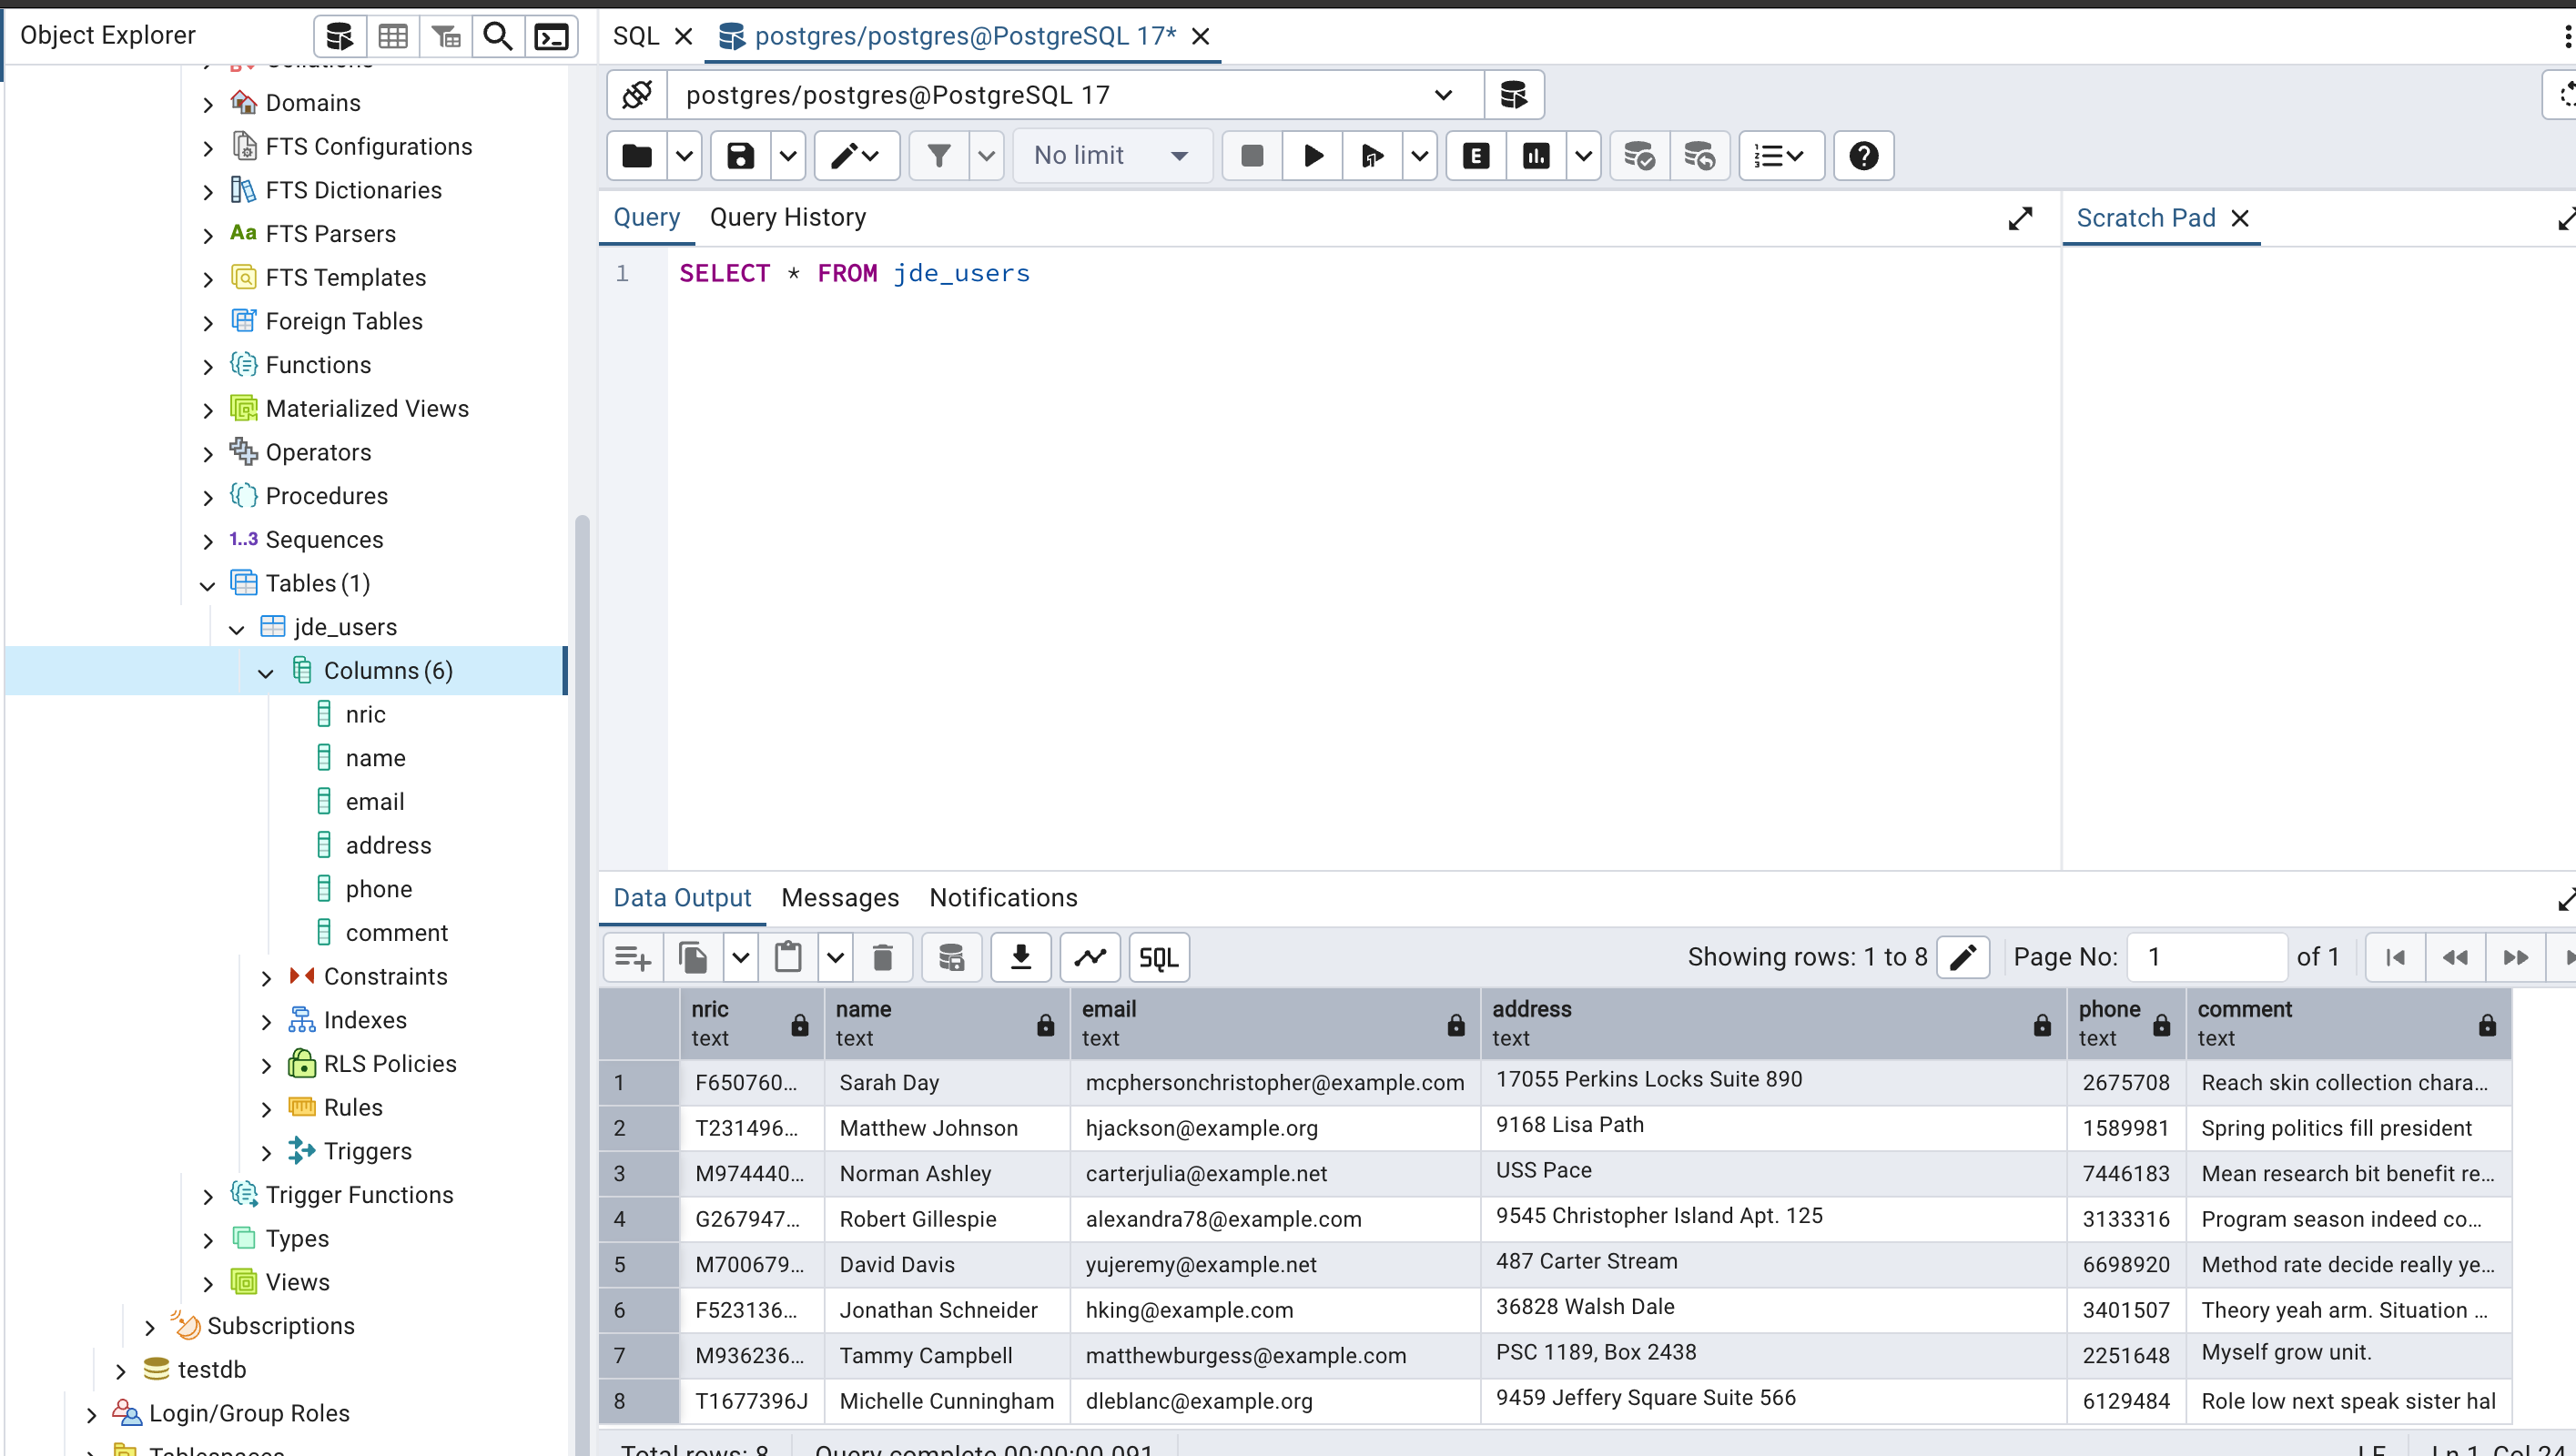